In [50]:
import matplotlib.pyplot as plt
import sacc
import numpy as np

In [2]:
file = '../data_vectors/summary_statistics_real.sacc' 
s = sacc.Sacc.load_fits(file)

In [3]:
gammat = sacc.standard_types.galaxy_shearDensity_xi_t
xip = sacc.standard_types.galaxy_shear_xi_plus

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [5]:
c = ['teal', 'powderblue', 'orange',  'cornflowerblue', 'tomato']

In [59]:
z_labels = ['$0.30 < z < 0.55$','$0.55 < z < 0.80$','$0.80 < z < 1.05$','$1.05 < z < 2.0$']

In [99]:
def plot_xip(s, theory=None):
    plt.clf()
    fig, ax = plt.subplots(2, 2, figsize=(4.5, 4.5), sharey=True, sharex=True)
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    for dt in s.get_data_types():
        print(dt)
        if dt == 'galaxy_shear_xi_plus':
            for i in range(4):

                theta, xi, cov = s.get_theta_xi(dt,'source_%s'%i , 'source_%s'%i, return_cov = True)
                if i<2: j = 0 
                else: j = 1
                    
                if theory is not None:
                    theta_th, xi_th, cov_th = theory.get_theta_xi(dt,'source_%s'%i , 'source_%s'%i, return_cov = True)

                    ax[j][i%2].plot(theta, xi_th, ls = '-', lw = '1.5', color = c[i], label = 'Theory')

                ax[j][i%2].errorbar(theta, xi, np.sqrt(np.diag(cov)), fmt = '.', capsize=1.5, elinewidth=0.8, color = c[i], label = 'Measurements')
                ax[j][i%2].text(0.65, 0.88, z_labels[i], horizontalalignment='center',
                              verticalalignment='center', transform=ax[j][i%2].transAxes)#, fontsize=12)
                ax[j][i%2].set_xscale('log')
                ax[j][i%2].set_yscale('log')
                
                if i>1: 
                    ax[j][i%2].set_xlabel(r'$\theta$ [arcmin]')
                if i%2<1:
                    ax[j][i%2].set_ylabel(r'$\xi_+$')

    ax[1][0].legend(frameon = False, loc = 'lower left')

    return fig

In [82]:
def plot_xip_ratios(s, theory):
    plt.clf()
    fig, ax = plt.subplots(2, 2, figsize=(6, 6), sharey=True, sharex=True)
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    for dt in s.get_data_types():
        print(dt)
        if dt == 'galaxy_shear_xi_plus':
            for i in range(4):

                theta, xi, cov = s.get_theta_xi(dt,'source_%s'%i , 'source_%s'%i, return_cov = True)
                theta_th, xi_th, cov_th = theory.get_theta_xi(dt,'source_%s'%i , 'source_%s'%i, return_cov = True)

                if i<2: j = 0 
                else: j = 1              

                ax[j][i%2].plot(theta, xi/xi_th, ls = '-', lw = '1.5', color = c[i], label ='Data/Theory')
                ax[j][i%2].text(0.85, 0.88, "S{}, S{}".format(i, i), horizontalalignment='center',
                              verticalalignment='center', transform=ax[j][i%2].transAxes, fontsize=12)
                ax[j][i%2].set_xscale('log')
                ax[j][i%2].axhline(y=1., color = 'k', ls = ':')
                ax[j][i%2].legend(frameon = False)
                if i>1: 
                    ax[j][i%2].set_xlabel(r'$\theta$ [arcmin]')
                if i%2<1:
                    ax[j][i%2].set_ylabel(r'$\xi_+$')
    
    return fig

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


galaxy_density_xi
galaxy_shearDensity_xi_t
galaxy_shear_xi_minus
galaxy_shear_xi_plus


<Figure size 432x288 with 0 Axes>

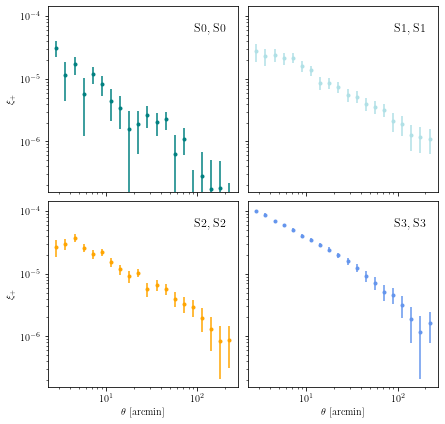

In [7]:
plot_xip(s)
plt.savefig('../plots/xip.pdf')

In [8]:
for s1, s2 in s.get_tracer_combinations():
    print (s1, s2)

lens_0 lens_0
source_0 lens_0
source_1 lens_0
source_2 lens_0
source_3 lens_0
source_0 source_0
source_1 source_0
source_1 source_1
source_2 source_0
source_2 source_1
source_2 source_2
source_3 source_0
source_3 source_1
source_3 source_2
source_3 source_3


## No shape noise run

In [43]:
file_data = '/Users/juditprat/Downloads/twopoint_data_real (1).sacc' 
d = sacc.Sacc.load_fits(file_data)

file_theory = '/Users/juditprat/Downloads/twopoint_theory_real.sacc' 
t = sacc.Sacc.load_fits(file_theory)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


galaxy_density_xi
galaxy_shearDensity_xi_t
galaxy_shear_xi_minus
galaxy_shear_xi_plus


<Figure size 432x288 with 0 Axes>

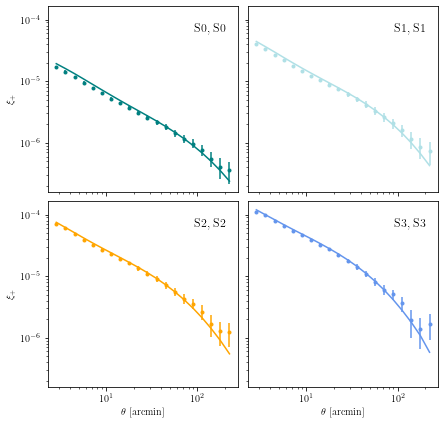

In [44]:
fig = plot_xip(d, theory = t)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


galaxy_density_xi
galaxy_shearDensity_xi_t
galaxy_shear_xi_minus
galaxy_shear_xi_plus


<Figure size 432x288 with 0 Axes>

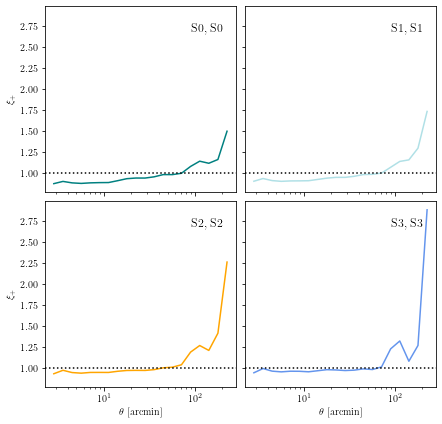

In [49]:
fig = plot_xip_ratios(d, t)

## With Shape Noise last run

In [67]:
file_data = '/Users/juditprat/Downloads/twopoint_data_real_with_shape_noise.sacc' 
d = sacc.Sacc.load_fits(file_data)

file_theory = '/Users/juditprat/Downloads/twopoint_theory_real_with_shape_noise.sacc' 
t = sacc.Sacc.load_fits(file_theory)

galaxy_density_xi
galaxy_shearDensity_xi_t
galaxy_shear_xi_minus
galaxy_shear_xi_plus


<Figure size 432x288 with 0 Axes>

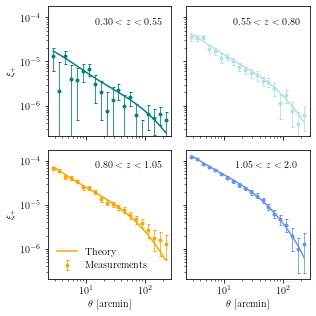

In [100]:
fig = plot_xip(d, theory = t)
plt.tight_layout()
plt.savefig('../plots/xip_with_shape_noise.pdf', pad_inches = 0.1)

In [102]:
d.get_data_points()

[DataPoint(data_type='galaxy_density_xi', tracers=('lens_0', 'lens_0'), value=0.8333245259820276, theta=2.8256442117228437, error=0.013044201496803697, weight=5463.0),
 DataPoint(data_type='galaxy_density_xi', tracers=('lens_0', 'lens_0'), value=0.6765798318046896, theta=3.553809882574355, error=0.010408050817725337, weight=7836.0),
 DataPoint(data_type='galaxy_density_xi', tracers=('lens_0', 'lens_0'), value=0.5028487384700409, theta=4.474429280844783, error=0.008272955088577656, weight=11120.0),
 DataPoint(data_type='galaxy_density_xi', tracers=('lens_0', 'lens_0'), value=0.3257959924343137, theta=5.635012911999266, error=0.006576828388209349, weight=15579.0),
 DataPoint(data_type='galaxy_density_xi', tracers=('lens_0', 'lens_0'), value=0.2237560232475597, theta=7.095215078641405, error=0.005229265831008478, weight=22771.0),
 DataPoint(data_type='galaxy_density_xi', tracers=('lens_0', 'lens_0'), value=0.1656331405903075, theta=8.944683666247453, error=0.00415855698438855, weight=3439